## Problem Statement:

The dataset contains 6 years of information(weekly stock information) on the stock prices of 10 different Indian Stocks. Calculate the mean and standard deviation on the stock returns and share insights. You are expected to do the Market Risk Analysis using Python.

### Dataset: Market Risk Dataset

### Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns # for making plots with seaborn
color = sns.color_palette()
import sklearn.metrics as metrics

import warnings
warnings.filterwarnings("ignore")

### Importing the dataset

In [2]:
Stock_prices = pd.read_csv("Market+Risk+Dataset.csv")

In [3]:
Stock_prices.head()

,Date,Infosys,Indian Hotel,Mahindra & Mahindra,Axis Bank,SAIL,Shree Cement,Sun Pharma,Jindal Steel,Idea Vodafone,Jet Airways
0,31-03-2014,264,69,455,263,68,5543,555,298,83,278
1,07-04-2014,257,68,458,276,70,5728,610,279,84,303
2,14-04-2014,254,68,454,270,68,5649,607,279,83,280
3,21-04-2014,253,68,488,283,68,5692,604,274,83,282
4,28-04-2014,256,65,482,282,63,5582,611,238,79,243


In [4]:
Stock_prices.tail()

,Date,Infosys,Indian Hotel,Mahindra & Mahindra,Axis Bank,SAIL,Shree Cement,Sun Pharma,Jindal Steel,Idea Vodafone,Jet Airways
309,02-03-2020,729,120,469,658,33,23110,401,146,3,22
310,09-03-2020,634,114,427,569,30,21308,384,121,6,18
311,16-03-2020,577,90,321,428,27,18904,365,105,3,16
312,23-03-2020,644,75,293,360,21,17666,338,89,3,14
313,30-03-2020,633,75,284,379,23,17546,352,82,3,14


In [5]:
for column_name in Stock_prices.columns:
    print(column_name)

Date
Infosys
Indian Hotel
Mahindra & Mahindra
Axis Bank
SAIL
Shree Cement
Sun Pharma
Jindal Steel
Idea Vodafone
Jet Airways


### Fixing messy column names(containing spaces) for ease of use

In [6]:
Stock_prices.columns=Stock_prices.columns.str.replace(' ','_').str.replace('.','') 

In [7]:
for column_name in Stock_prices.columns:
    print(column_name)

Date
Infosys
Indian_Hotel
Mahindra_&_Mahindra
Axis_Bank
SAIL
Shree_Cement
Sun_Pharma
Jindal_Steel
Idea_Vodafone
Jet_Airways


### First, let us check the number of rows (observations) and the number of columns (variables)

In [8]:
print('The number of rows (observations) is',Stock_prices.shape[0],'\n''The number of columns (variables) is',Stock_prices.shape[1])

The number of rows (observations) is 314 
The number of columns (variables) is 11


In [9]:
Stock_prices.size

3454

### Checking data types of all columns

In [10]:
Stock_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314 entries, 0 to 313
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Date                 314 non-null    object
 1   Infosys              314 non-null    int64 
 2   Indian_Hotel         314 non-null    int64 
 3   Mahindra_&_Mahindra  314 non-null    int64 
 4   Axis_Bank            314 non-null    int64 
 5   SAIL                 314 non-null    int64 
 6   Shree_Cement         314 non-null    int64 
 7   Sun_Pharma           314 non-null    int64 
 8   Jindal_Steel         314 non-null    int64 
 9   Idea_Vodafone        314 non-null    int64 
 10  Jet_Airways          314 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 27.1+ KB


#### Changing Data column object to datetime64

In [11]:
Stock_prices['dates']=[pd.to_datetime(d)for d in Stock_prices['Date']] 

In [12]:
Stock_prices.dtypes.value_counts() 

int64             10
object             1
datetime64[ns]     1
dtype: int64

In [13]:
Stock_prices['Date'] = pd.to_datetime(Stock_prices['Date'])
Stock_prices.dtypes.value_counts()

int64             10
datetime64[ns]     2
dtype: int64

In [14]:
Stock_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314 entries, 0 to 313
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 314 non-null    datetime64[ns]
 1   Infosys              314 non-null    int64         
 2   Indian_Hotel         314 non-null    int64         
 3   Mahindra_&_Mahindra  314 non-null    int64         
 4   Axis_Bank            314 non-null    int64         
 5   SAIL                 314 non-null    int64         
 6   Shree_Cement         314 non-null    int64         
 7   Sun_Pharma           314 non-null    int64         
 8   Jindal_Steel         314 non-null    int64         
 9   Idea_Vodafone        314 non-null    int64         
 10  Jet_Airways          314 non-null    int64         
 11  dates                314 non-null    datetime64[ns]
dtypes: datetime64[ns](2), int64(10)
memory usage: 29.6 KB


In [15]:
Stock_prices.isnull().sum()

Date                   0
Infosys                0
Indian_Hotel           0
Mahindra_&_Mahindra    0
Axis_Bank              0
SAIL                   0
Shree_Cement           0
Sun_Pharma             0
Jindal_Steel           0
Idea_Vodafone          0
Jet_Airways            0
dates                  0
dtype: int64

In [16]:
Stock_prices.isnull().sum().sum()

0

### Now, let us check the basic measures of descriptive statistics

In [17]:
Stock_prices.describe()

,Infosys,Indian_Hotel,Mahindra_&_Mahindra,Axis_Bank,SAIL,Shree_Cement,Sun_Pharma,Jindal_Steel,Idea_Vodafone,Jet_Airways
count,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000
mean,511.340764,114.560510,636.678344,540.742038,59.095541,14806.410828,633.468153,147.627389,53.713376,372.659236
std,135.952051,22.509732,102.879975,115.835569,15.810493,4288.275085,171.855893,65.879195,31.248985,202.262668
min,234.000000,64.000000,284.000000,263.000000,21.000000,5543.000000,338.000000,53.000000,3.000000,14.000000
25%,424.000000,96.000000,572.000000,470.500000,47.000000,10952.250000,478.500000,88.250000,25.250000,243.250000
50%,466.500000,115.000000,625.000000,528.000000,57.000000,16018.500000,614.000000,142.500000,53.000000,376.000000
75%,630.750000,134.000000,678.000000,605.250000,71.750000,17773.250000,785.000000,182.750000,82.000000,534.000000
max,810.000000,157.000000,956.000000,808.000000,104.000000,24806.000000,1089.000000,338.000000,117.000000,871.000000


### 1: Draw Stock Price Graph(Stock Price vs Time) for any 2 given stocks with inference

#### Lets us plot & see price trend over time for different companies

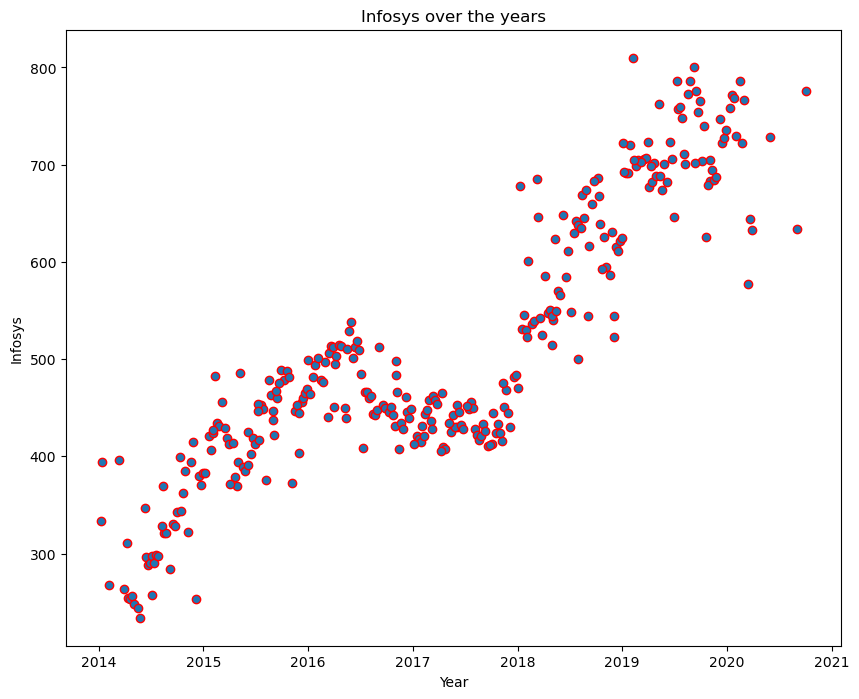

In [18]:
plt.figure(figsize = (10, 8))
Stock_prices['dates'] = [pd.to_datetime(d) for d in Stock_prices['Date']]
plt.scatter(Stock_prices['dates'], Stock_prices['Infosys'], edgecolors='r')
plt.xlabel('Year')
plt.ylabel('Infosys')
plt.title('Infosys over the years')
plt.show()

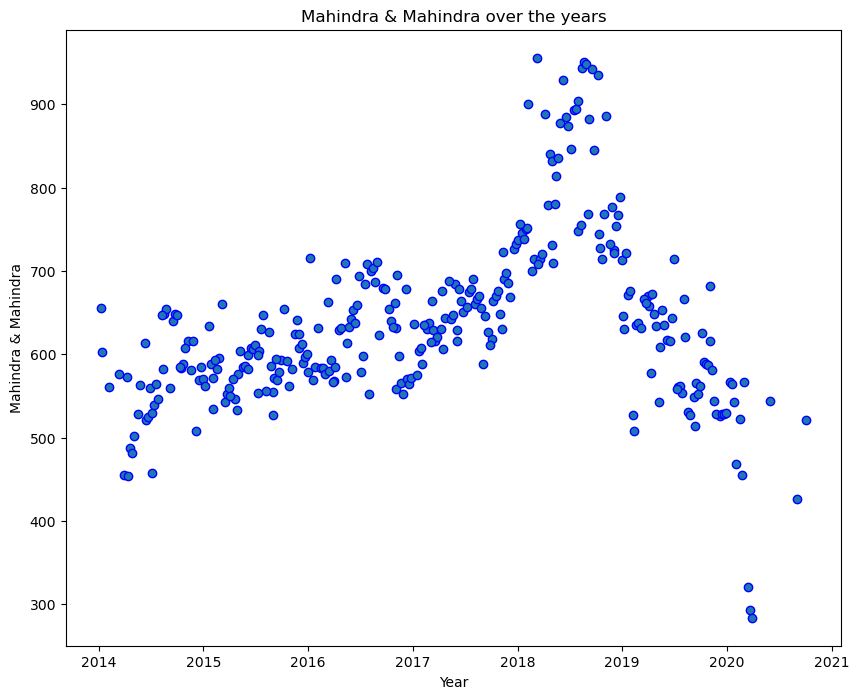

In [19]:
plt.figure(figsize = (10, 8))
plt.scatter(Stock_prices['dates'], Stock_prices['Mahindra_&_Mahindra'], edgecolors='b')
plt.xlabel('Year')
plt.ylabel('Mahindra & Mahindra')
plt.title('Mahindra & Mahindra over the years')
plt.show()

**Insights:**
* The dataset contains weekly stock prices of 10 different Indian stocks spanning over 6 years. Each row represents a week, and columns represent different stocks along with the date.
* The messy column names were cleaned by replacing spaces with underscores for ease of use.
* Data types were checked and converted appropriately. The 'Date' column was converted to datetime format.
* Indicates the number of data points available for each stock. All stocks have 314 data points, suggesting that there are no missing values.
* Infosys has an average stock price of approximately 511.34.
* Mahindra & Mahindra has an average stock price of around 636.68.
* Infosys has a standard deviation of approximately 135.95, suggesting moderate volatility.
* Shree Cement has a much higher standard deviation of around 4288.28, indicating significant volatility in its stock prices.
* The minimum stock price for Infosys is 234, while the maximum is 810.
* At the 25th percentile, Infosys has a stock price of 424, suggesting that 25% of the observations are below this value.
* At the 75th percentile, Shree Cement has a stock price of 17773.25, indicating that 75% of the observations are below this value.
* Overall, these descriptive statistics offer a comprehensive overview of the central tendency, variability, and distribution of stock prices for each company, which is crucial for market risk analysis and investment decision-making.

### 2: Calculate Returns for all stocks with inference
Steps for calculating returns from prices:
Take logarithms
Take differences

In [20]:
Stock_prices_new = np.log(Stock_prices.drop(['Date','dates'], axis=1)).diff(axis=0, periods=1)

#### Checking the rows & columns of dataset

In [21]:
Stock_prices_new.head()

,Infosys,Indian_Hotel,Mahindra_&_Mahindra,Axis_Bank,SAIL,Shree_Cement,Sun_Pharma,Jindal_Steel,Idea_Vodafone,Jet_Airways
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.026873,-0.014599,0.006572,0.048247,0.028988,0.032831,0.094491,-0.065882,0.011976,0.086112
2,-0.011742,0.000000,-0.008772,-0.021979,-0.028988,-0.013888,-0.004930,0.000000,-0.011976,-0.078943
3,-0.003945,0.000000,0.072218,0.047025,0.000000,0.007583,-0.004955,-0.018084,0.000000,0.007117
4,0.011788,-0.045120,-0.012371,-0.003540,-0.076373,-0.019515,0.011523,-0.140857,-0.049393,-0.148846


In [22]:
Stock_prices_new.tail()

,Infosys,Indian_Hotel,Mahindra_&_Mahindra,Axis_Bank,SAIL,Shree_Cement,Sun_Pharma,Jindal_Steel,Idea_Vodafone,Jet_Airways
309,0.009649,-0.110348,0.030305,-0.057580,-0.087011,0.023688,0.072383,-0.053346,-0.287682,-0.127833
310,-0.139625,-0.051293,-0.093819,-0.145324,-0.095310,-0.081183,-0.043319,-0.187816,0.693147,-0.200671
311,-0.094207,-0.236389,-0.285343,-0.284757,-0.105361,-0.119709,-0.050745,-0.141830,-0.693147,-0.117783
312,0.109856,-0.182322,-0.091269,-0.173019,-0.251314,-0.067732,-0.076851,-0.165324,0.000000,-0.133531
313,-0.017228,0.000000,-0.031198,0.051432,0.090972,-0.006816,0.040585,-0.081917,0.000000,0.000000


In [23]:
Stock_prices_new.shape

(314, 10)

In [24]:
Stock_prices_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314 entries, 0 to 313
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Infosys              313 non-null    float64
 1   Indian_Hotel         313 non-null    float64
 2   Mahindra_&_Mahindra  313 non-null    float64
 3   Axis_Bank            313 non-null    float64
 4   SAIL                 313 non-null    float64
 5   Shree_Cement         313 non-null    float64
 6   Sun_Pharma           313 non-null    float64
 7   Jindal_Steel         313 non-null    float64
 8   Idea_Vodafone        313 non-null    float64
 9   Jet_Airways          313 non-null    float64
dtypes: float64(10)
memory usage: 24.7 KB


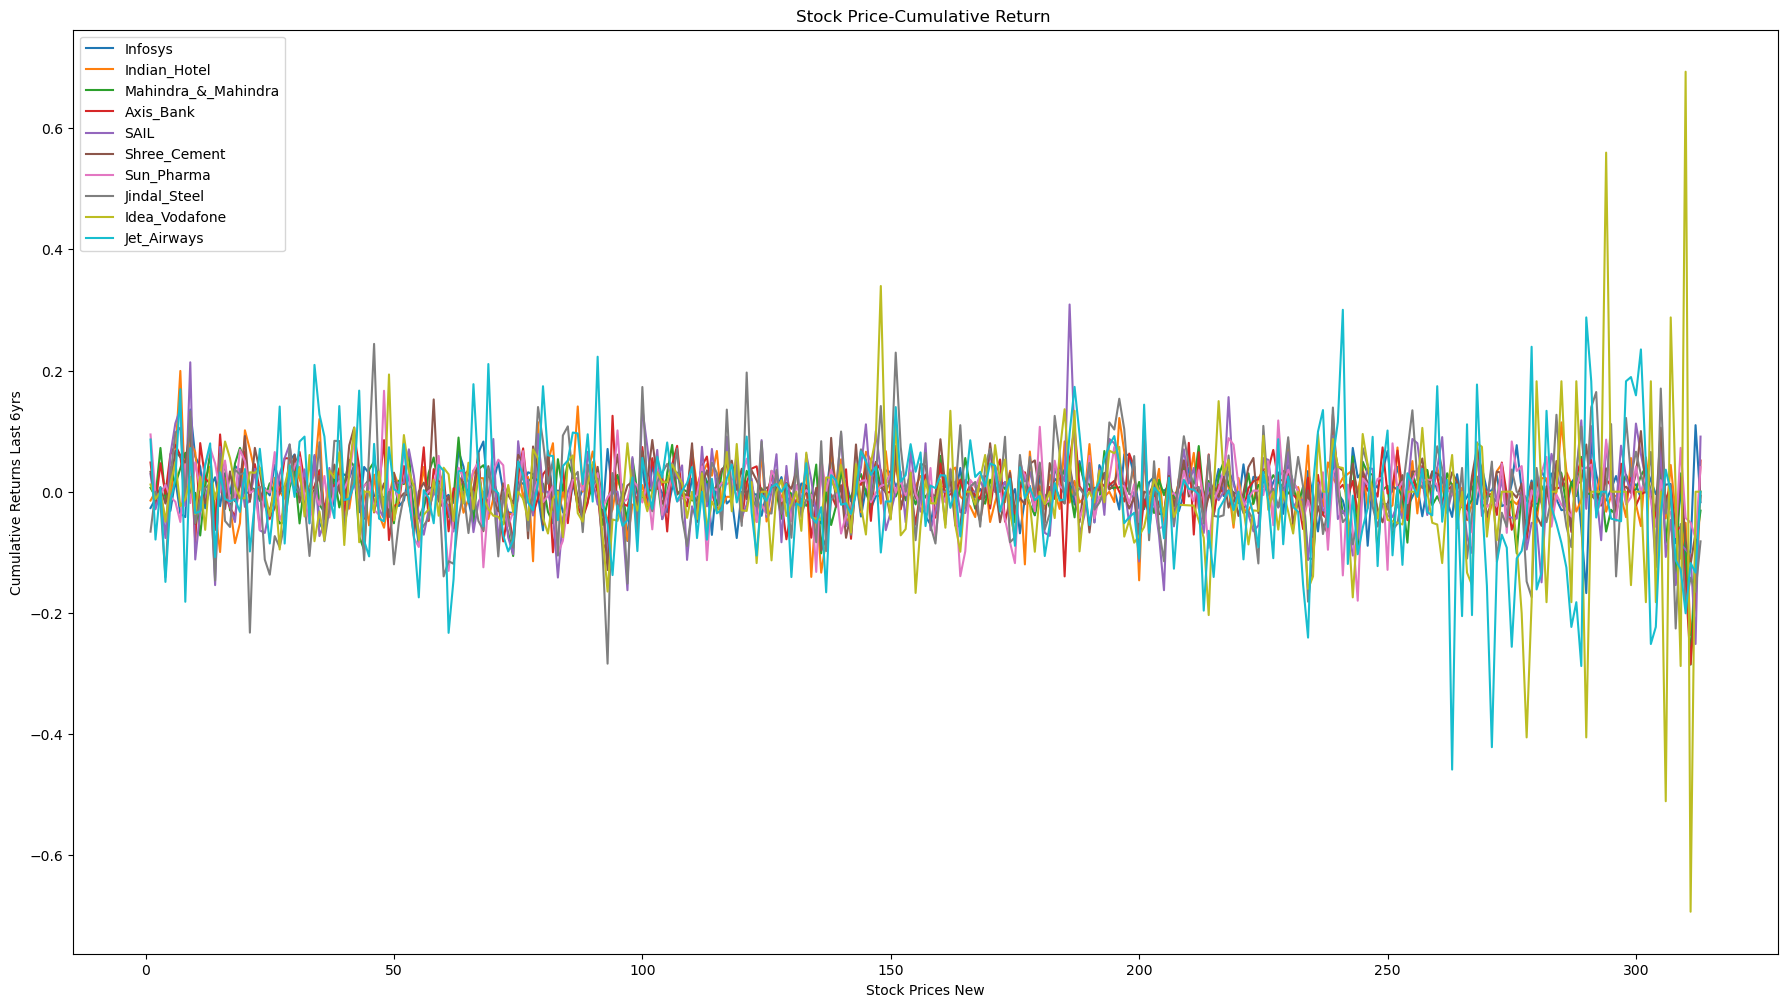

In [25]:
Stock_prices_new.plot(figsize=(22,12)) 
plt.xlabel("Stock Prices New") 
plt.ylabel("Cumulative Returns Last 6yrs") 
plt.title("Stock Price-Cumulative Return ")
plt.show()

**Insights:**
* The resulting dataframe, Stock_prices_new, contains the calculated returns for each stock. It has 314 rows and 10 columns, indicating the weekly returns for each stock over the past 6 years. The data types for all columns are float64, representing numerical values.
* However, there are some missing values in the dataframe, as indicated by the non-null count being less than the total number of rows (314). These missing values may need to be addressed depending on the specific requirements of the analysis.
* Lastly, a plot is generated to visualize the cumulative returns for all stocks over the past 6 years. This plot provides an overview of how cumulative returns have evolved over time for each stock.

### 3: Calculate Stock Means and Standard Deviation for all stocks with inference
We now look at Means & Standard Deviations of these returns

Stock Means: Average returns that the stock is making on a week to week basis

Stock Standard Deviation : It is a measure of volatility meaning the more a stock's returns vary from the
s
tock's average return, the more volatile the stock

#### Calculating stock means

In [26]:
Stock_prices_means = Stock_prices_new.mean(axis = 0)
Stock_prices_means

Infosys                0.002794
Indian_Hotel           0.000266
Mahindra_&_Mahindra   -0.001506
Axis_Bank              0.001167
SAIL                  -0.003463
Shree_Cement           0.003681
Sun_Pharma            -0.001455
Jindal_Steel          -0.004123
Idea_Vodafone         -0.010608
Jet_Airways           -0.009548
dtype: float64

#### Calculating stock standard deviation

In [27]:
Stock_prices_sd = Stock_prices_new.std(axis = 0)
Stock_prices_sd

Infosys                0.035070
Indian_Hotel           0.047131
Mahindra_&_Mahindra    0.040169
Axis_Bank              0.045828
SAIL                   0.062188
Shree_Cement           0.039917
Sun_Pharma             0.045033
Jindal_Steel           0.075108
Idea_Vodafone          0.104315
Jet_Airways            0.097972
dtype: float64

#### Standard Deviation renamed as Volatility and checking the values in descending order first by Average
**followed by Volatility:
Calculating Stock Mean as Average**

In [28]:
Stock_df = pd.DataFrame({'Average':Stock_prices_means, 'Volatility': Stock_prices_sd})
Stock_df.sort_values(by=['Average'],ascending=False)

,Average,Volatility
Shree_Cement,0.003681,0.039917
Infosys,0.002794,0.035070
Axis_Bank,0.001167,0.045828
Indian_Hotel,0.000266,0.047131
Sun_Pharma,-0.001455,0.045033
Mahindra_&_Mahindra,-0.001506,0.040169
SAIL,-0.003463,0.062188
Jindal_Steel,-0.004123,0.075108
Jet_Airways,-0.009548,0.097972
Idea_Vodafone,-0.010608,0.104315


#### Calculating Stock Standard Deviation as Volatility

In [29]:
Stock_df = pd.DataFrame({'Average':Stock_prices_means, 'Volatility': Stock_prices_sd}) 
Stock_df.sort_values(by=['Volatility'],ascending=False)

,Average,Volatility
Idea_Vodafone,-0.010608,0.104315
Jet_Airways,-0.009548,0.097972
Jindal_Steel,-0.004123,0.075108
SAIL,-0.003463,0.062188
Indian_Hotel,0.000266,0.047131
Axis_Bank,0.001167,0.045828
Sun_Pharma,-0.001455,0.045033
Mahindra_&_Mahindra,-0.001506,0.040169
Shree_Cement,0.003681,0.039917
Infosys,0.002794,0.035070


**Insights:**
* Infosys has the highest stock means 0.002794 and Jet_Airways has the lowest stock means -0.009548
* Idea_Vodafone has the highest stock standard deviation 0.104315 and Infosys has the lowest stock standard deviation 0.035070
* Shree_Cement has the highest average return of 0.003681 and Idea_Vodafone has the lowest average return of -0.010608.
* Idea_Vodafone has the highest volatility of 0.104315 and Infosys has the lowest volatility of 0.035070.

### 4: Draw a plot of Stock Means vs Standard Deviation and state your inference

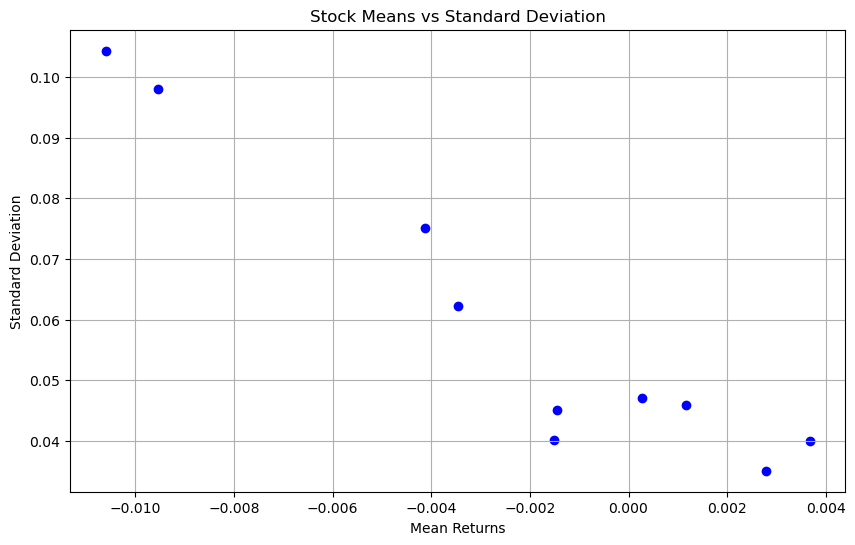

In [30]:
# Draw plot of Stock Means vs Standard Deviation
plt.figure(figsize=(10, 6))
plt.scatter(Stock_df['Average'], Stock_df['Volatility'], color='blue')
plt.title('Stock Means vs Standard Deviation')
plt.xlabel('Mean Returns')
plt.ylabel('Standard Deviation')
plt.grid(True)
plt.show()

**Insights:**
* Stocks on the left side show high volatility and low returns.
* Stocks on the bottom right show low volatility with high returns.
* This plot helps find a balance between risk and reward when investing in different companies.

### 5: Conclusions and Recommendations

* The dataset encompasses weekly stock prices for 10 Indian stocks over a 6-year span.
* Column names were cleaned for improved usability, and appropriate data type conversions were performed.
* Descriptive statistics provided valuable insights into the central tendencies, variabilities, and distributions of stock prices for each company.
* Variations in average stock prices and volatility levels were observed across companies, crucial for assessing market risk and forming investment strategies.
* Visualizations were created to depict the price trends over time for selected stocks, such as Infosys and Mahindra & Mahindra.
* These visualizations offer qualitative assessments of price movements and potential trends in stock prices.
* Returns were computed for all stocks using logarithmic transformations and differencing techniques.
* A plot illustrating cumulative returns over the 6-year period was generated, providing an overview of stock performance.
* Mean returns and standard deviations (volatility) were calculated to evaluate average returns and risk levels for each stock.
* Companies like Shree Cement demonstrated relatively high average returns with moderate volatility, while Idea Vodafone exhibited high volatility and low returns.
* A scatter plot depicting the relationship between stock means and standard deviations was generated.
* This plot facilitates the identification of stocks with desirable risk-return profiles, balancing volatility with potential returns.
* In summary, this analysis furnishes valuable insights for investors to comprehend the risks associated with different stocks and make well-informed investment decisions. It is advisable to conduct further analysis on individual stocks based on specific investment objectives and risk tolerances. Additionally, regular monitoring and adjustment of investment portfolios are recommended to adapt to evolving market conditions.

## END